In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import scipy as sp 
import scipy.stats

In [2]:
retail_df = pd.read_csv('Dataset/Online Retail Data Set.csv', encoding="ISO-8859-1", dtype= {'CustomerID': 'Int64'})
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom


In [3]:
retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0


In [4]:
retail_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       Int64
Country         object
dtype: object

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  Int64  
 7   Country      541909 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 33.6+ MB


In [6]:
retail_df.shape

(541909, 8)

In [7]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom


In [8]:
retail_df['Description'] = retail_df['Description'].str.replace('.','').str.upper().str.strip()
retail_df['Description'] = retail_df['Description'].replace('\s+',' ',regex = True)
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype(str).str.upper()
retail_df['StockCode'] = retail_df['StockCode'].str.upper()
retail_df['Country'] = retail_df['Country'].str.upper()
retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,01-12-2010 08:26,3.39,17850,UNITED KINGDOM


In [9]:
retail_df.shape

(541909, 8)

In [10]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,01-12-2010 08:26,3.39,17850,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680,FRANCE
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680,FRANCE
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680,FRANCE
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680,FRANCE


In [11]:
def dataframe_summary(dataframe):
    """
    Generates a summary DataFrame containing information about null values, number of unique values,
    and duplicated rows for each column in the input DataFrame.

    Parameters:
    dataframe (pandas DataFrame): The DataFrame to be summarized.

    Returns:
    pandas DataFrame: A summary DataFrame containing information about null values, number of unique values,
    and duplicated rows for each column in the input DataFrame.
    """

    null_counts = dataframe.isnull().sum()
    unique_counts = dataframe.nunique()
    duplicated_counts = dataframe.duplicated().sum()

    summary_df = pd.DataFrame({
        'Null Values': null_counts,
        'Unique Values': unique_counts,
        'Duplicated Rows': duplicated_counts
    })

    return summary_df

dataframe_summary(retail_df)

,Null Values,Unique Values,Duplicated Rows
InvoiceNo,0,25900,5268
StockCode,0,3958,5268
Description,1454,4183,5268
Quantity,0,722,5268
InvoiceDate,0,23260,5268
UnitPrice,0,1630,5268
CustomerID,135080,4372,5268
Country,0,38,5268


In [12]:
def duplicated_rows(dataframe):
    """
    Finds duplicated rows in the input DataFrame and returns a DataFrame containing them.

    Parameters:
    dataframe (pandas DataFrame): The DataFrame to search for duplicated rows.

    Returns:
    pandas DataFrame: A DataFrame containing duplicated rows from the input DataFrame.
    """

    duplicated_rows = dataframe[dataframe.duplicated()]
    return duplicated_rows

duplicated_rows(retail_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908,UNITED KINGDOM
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908,UNITED KINGDOM
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908,UNITED KINGDOM
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908,UNITED KINGDOM
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,09-12-2011 11:34,0.39,14446,UNITED KINGDOM
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,09-12-2011 11:34,2.49,14446,UNITED KINGDOM
541692,581538,22992,REVOLVER WOODEN RULER,1,09-12-2011 11:34,1.95,14446,UNITED KINGDOM
541699,581538,22694,WICKER STAR,1,09-12-2011 11:34,2.10,14446,UNITED KINGDOM


In [13]:
retail_df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LOST',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [14]:
def null_rows(dataframe, column_name):
    """
    Finds rows in the input DataFrame where the specified column contains null values and returns a DataFrame containing them.

    Parameters:
    dataframe (pandas DataFrame): The DataFrame to search for null values in the specified column.
    column_name (str): The name of the column to check for null values.

    Returns:
    pandas DataFrame: A DataFrame containing rows from the input DataFrame where the specified column contains null values.
    """

    null_rows = dataframe[dataframe[column_name].isnull()]
    return null_rows

null_rows(retail_df, 'Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,<NA>,UNITED KINGDOM
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,<NA>,UNITED KINGDOM
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,<NA>,UNITED KINGDOM
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,<NA>,UNITED KINGDOM
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,<NA>,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,07-12-2011 18:26,0.0,<NA>,UNITED KINGDOM
535326,581203,23406,NaN,15,07-12-2011 18:31,0.0,<NA>,UNITED KINGDOM
535332,581209,21620,NaN,6,07-12-2011 18:35,0.0,<NA>,UNITED KINGDOM
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,<NA>,UNITED KINGDOM


In [15]:
print(f"Minimum value in column Quantity: {retail_df['Quantity'].min()}")
print(f"Maximum value in column Quantity: {retail_df['Quantity'].max()}")

Minimum value in column Quantity: -80995
Maximum value in column Quantity: 80995


In [16]:
print(f"Unique Values: \n{retail_df.nunique()}")

Unique Values: 
InvoiceNo      25900
StockCode       3958
Description     4183
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [17]:
def datetime_conversion(dataframe, column_name, date_format):
    """
    Converts a column containing date and time strings to datetime format within the same DataFrame.

    Parameters:
    dataframe (pandas DataFrame): The DataFrame containing the column to be converted.
    column_name (str): The name of the column to be converted to datetime format.
    date_format (str): The format of the datetime strings in the column.

    Returns:
    None
    """

    dataframe[column_name] = pd.to_datetime(dataframe[column_name], format=date_format)
    
datetime_conversion(retail_df, 'InvoiceDate', '%d-%m-%Y %H:%M')

In [18]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
 7   Country      541909 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.6+ MB


In [19]:
stock_len5_to_6 = retail_df.query('5 < StockCode.str.len() < 7').sort_values(by='StockCode')
stock_len5_to_6

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
265293,560213,10123C,NaN,-18,2011-07-15 15:05:00,0.00,<NA>,UNITED KINGDOM
109611,545655,10123C,HEARTS WRAPPING TAPE,3,2011-03-04 13:58:00,0.65,14670,UNITED KINGDOM
140929,548491,10123C,HEARTS WRAPPING TAPE,1,2011-03-31 13:14:00,0.65,14064,UNITED KINGDOM
5451,536863,10123C,HEARTS WRAPPING TAPE,1,2010-12-03 11:19:00,0.65,17967,UNITED KINGDOM
150159,549349,10123G,NaN,-38,2011-04-08 11:13:00,0.00,<NA>,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
37066,539453,90214Z,"LETTER ""Z"" BLING KEY RING",1,2010-12-17 17:08:00,0.85,<NA>,UNITED KINGDOM
16777,537666,90214Z,"LETTER ""Z"" BLING KEY RING",1,2010-12-07 18:36:00,0.85,<NA>,UNITED KINGDOM
379763,569700,90214Z,"LETTER ""Z"" BLING KEY RING",2,2011-10-05 15:56:00,0.83,<NA>,UNITED KINGDOM
278756,561217,90214Z,"LETTER ""Z"" BLING KEY RING",1,2011-07-25 17:09:00,0.83,<NA>,UNITED KINGDOM


In [20]:
stock_len4 = retail_df.query('StockCode.str.len() < 5').sort_values(by='StockCode')
stock_len4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,ADJUST BAD DEBT,1,2011-08-12 14:51:00,-11062.06,<NA>,UNITED KINGDOM
299984,A563187,B,ADJUST BAD DEBT,1,2011-08-12 14:52:00,-11062.06,<NA>,UNITED KINGDOM
299982,A563185,B,ADJUST BAD DEBT,1,2011-08-12 14:50:00,11062.06,<NA>,UNITED KINGDOM
490430,578054,C2,CARRIAGE,1,2011-11-22 14:59:00,50.00,14911,EIRE
508632,579256,C2,CARRIAGE,1,2011-11-29 08:07:00,50.00,13349,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
96683,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,6.70,<NA>,UNITED KINGDOM
96682,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,<NA>,UNITED KINGDOM
96681,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,<NA>,UNITED KINGDOM
96688,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,7.69,<NA>,UNITED KINGDOM


In [21]:
stock_len5 = retail_df.query('StockCode.str.len() == 5').sort_values(by='StockCode')
stock_len5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
27982,538593,10002,INFLATABLE POLITICAL GLOBE,24,2010-12-13 11:51:00,0.85,16701,UNITED KINGDOM
64438,541615,10002,INFLATABLE POLITICAL GLOBE,6,2011-01-20 10:43:00,0.85,16395,UNITED KINGDOM
106195,545316,10002,INFLATABLE POLITICAL GLOBE,2,2011-03-01 14:14:00,1.63,<NA>,UNITED KINGDOM
56225,541094,10002,INFLATABLE POLITICAL GLOBE,11,2011-01-13 13:36:00,0.85,13246,UNITED KINGDOM
23896,538255,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-10 12:33:00,0.85,14911,EIRE
...,...,...,...,...,...,...,...,...
243930,558475,90208,PAIR OF PINK FLOWER CLUSTER SLIDE,1,2011-06-29 15:58:00,2.48,<NA>,UNITED KINGDOM
15645,537638,90208,PAIR OF PINK FLOWER CLUSTER SLIDE,1,2010-12-07 15:28:00,2.54,<NA>,UNITED KINGDOM
357474,568095,90208,PAIR OF PINK FLOWER CLUSTER SLIDE,6,2011-09-23 14:49:00,2.55,14911,EIRE
35639,539436,90208,PAIR OF PINK FLOWER CLUSTER SLIDE,1,2010-12-17 14:49:00,2.54,<NA>,UNITED KINGDOM


In [22]:
stock_lenm6 = retail_df.query('StockCode.str.len() > 7').sort_values(by='StockCode')
stock_lenm6

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
135590,C547904,AMAZONFEE,AMAZON FEE,-1,2011-03-28 12:02:00,219.76,<NA>,UNITED KINGDOM
96845,C544589,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:11:00,5258.77,<NA>,UNITED KINGDOM
287150,C562086,AMAZONFEE,AMAZON FEE,-1,2011-08-02 12:27:00,6721.37,<NA>,UNITED KINGDOM
287103,C562062,AMAZONFEE,AMAZON FEE,-1,2011-08-02 12:17:00,4575.64,<NA>,UNITED KINGDOM
124741,C546987,AMAZONFEE,AMAZON FEE,-1,2011-03-18 12:56:00,5693.05,<NA>,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
145463,548893,GIFT_0001_40,DOTCOMGIFTSHOP GIFT VOUCHER £4000,1,2011-04-04 15:54:00,33.33,<NA>,UNITED KINGDOM
239744,558066,GIFT_0001_50,DOTCOMGIFTSHOP GIFT VOUCHER £5000,1,2011-06-24 15:45:00,41.67,<NA>,UNITED KINGDOM
245516,558614,GIFT_0001_50,DOTCOMGIFTSHOP GIFT VOUCHER £5000,1,2011-06-30 15:56:00,41.67,<NA>,UNITED KINGDOM
42057,539958,GIFT_0001_50,DOTCOMGIFTSHOP GIFT VOUCHER £5000,1,2010-12-23 13:26:00,42.55,<NA>,UNITED KINGDOM


In [23]:
final = retail_df.query('4 < StockCode.str.len() < 7').sort_values(by='StockCode')
final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4272,536756,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-02 14:23:00,0.85,<NA>,UNITED KINGDOM
97459,544634,10002,INFLATABLE POLITICAL GLOBE,12,2011-02-22 11:02:00,0.85,17994,UNITED KINGDOM
56225,541094,10002,INFLATABLE POLITICAL GLOBE,11,2011-01-13 13:36:00,0.85,13246,UNITED KINGDOM
92755,544205,10002,INFLATABLE POLITICAL GLOBE,1,2011-02-17 10:31:00,1.63,<NA>,UNITED KINGDOM
22380,538167,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-09 18:58:00,0.85,14713,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
368235,568949,90214Z,"LETTER ""Z"" BLING KEY RING",1,2011-09-29 15:13:00,0.83,<NA>,UNITED KINGDOM
221338,556243,90214Z,"LETTER ""Z"" BLING KEY RING",1,2011-06-09 16:07:00,0.83,<NA>,UNITED KINGDOM
24905,538349,90214Z,"LETTER ""Z"" BLING KEY RING",1,2010-12-10 14:59:00,0.85,<NA>,UNITED KINGDOM
16777,537666,90214Z,"LETTER ""Z"" BLING KEY RING",1,2010-12-07 18:36:00,0.85,<NA>,UNITED KINGDOM


In [24]:
retail_df = retail_df.drop(retail_df[~retail_df.index.isin(final.index)].index)

In [25]:
retail_df.shape

(538524, 8)

In [26]:
zero_price_rows = retail_df[retail_df['UnitPrice'] == 0.00]
zero_price_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,<NA>,UNITED KINGDOM
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,<NA>,UNITED KINGDOM
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,<NA>,UNITED KINGDOM
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,<NA>,UNITED KINGDOM
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,<NA>,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,<NA>,UNITED KINGDOM
538504,581406,46000M,POLYESTER FILLER PAD 45X45CM,240,2011-12-08 13:58:00,0.0,<NA>,UNITED KINGDOM
538505,581406,46000S,POLYESTER FILLER PAD 40X40CM,300,2011-12-08 13:58:00,0.0,<NA>,UNITED KINGDOM
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,<NA>,UNITED KINGDOM


In [27]:
retail_df = retail_df.drop(retail_df[retail_df.index.isin(zero_price_rows.index)].index)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM


In [28]:
zero_price_rows = retail_df[retail_df['UnitPrice'] == 0.00]
zero_price_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [29]:
invoice_details = retail_df.query('InvoiceNo.str.len() == 6').sort_values(by='InvoiceNo')
invoice_details

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,FRANCE
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,FRANCE
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,FRANCE
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,FRANCE


In [30]:
retail_df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     50,     -1,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     11,     33,     13,     -4,
           -5,     -7,     -3,     70,    252,     60,    216,    384,
           27,     15,     22,     19,     17,     21,     34,     47,
          108,     52,  -9360,     75,    270,     42,    240,     90,
          320,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     39,    -48,    -50,     56,     26,   1440,
           31,     82,     78,     97,     98,     35,     -8,    720,
          -20,    156,    324,     38,     37,     49,     95,     -9,
          -11,     29,     41,    -10,    -72,    402,    378,    150,
      

In [31]:
print(f"Minimum value in column Quantity: {retail_df['Quantity'].min()}")
print(f"Maximum value in column Quantity: {retail_df['Quantity'].max()}")

Minimum value in column Quantity: -80995
Maximum value in column Quantity: 80995


In [32]:
print(f"Minimum value in column UnitPrice: {retail_df['UnitPrice'].min()}")
print(f"Maximum value in column UnitPrice: {retail_df['UnitPrice'].max()}")

Minimum value in column UnitPrice: 0.03
Maximum value in column UnitPrice: 649.5


In [33]:
def map_price_range(df):
    price_ranges = [(0, 2), (2, 5), (5, 10), (10, 20), (20, 50), (50, 150), (150, 300), (300, 700)]
    labels = ['Very Cheap', 'Cheap', 'Moderate', 'Expensive', 'More Expensive', 'High', 'Very High', 'Luxury']

    df['PriceRange'] = pd.cut(df['UnitPrice'], bins=[low for low, high in price_ranges] + [max(high for low, high in price_ranges)], labels=labels)
    return df

retail_df = map_price_range(retail_df)

In [34]:
retail_df['Date'] = retail_df['InvoiceDate'].dt.day
retail_df['Month'] = retail_df['InvoiceDate'].dt.month
retail_df['Year'] = retail_df['InvoiceDate'].dt.year

retail_df = retail_df.drop(columns=['InvoiceDate'])

In [35]:
def create_return_product_column(df):
    df['return_product'] = df['Quantity'].apply(lambda x: 1 if x < 0 else 0)
    return df

retail_df = create_return_product_column(retail_df)

In [36]:
retail_df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [37]:
def map_month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Quarter1'
    elif month in [4, 5, 6]:
        return 'Quarter2'
    elif month in [7, 8, 9]:
        return 'Quarter3'
    elif month in [10, 11, 12]:
        return 'Quarter4'

retail_df['Quarters'] = retail_df['Month'].apply(map_month_to_quarter)

retail_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,PriceRange,Date,Month,Year,return_product,Quarters
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,3.39,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,FRANCE,Very Cheap,9,12,2011,0,Quarter4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,FRANCE,Cheap,9,12,2011,0,Quarter4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,FRANCE,Cheap,9,12,2011,0,Quarter4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,FRANCE,Cheap,9,12,2011,0,Quarter4


In [38]:
retail_df['Cost'] = retail_df['UnitPrice'] * retail_df['Quantity']
retail_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,PriceRange,Date,Month,Year,return_product,Quarters,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,3.39,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,FRANCE,Very Cheap,9,12,2011,0,Quarter4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,FRANCE,Cheap,9,12,2011,0,Quarter4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,FRANCE,Cheap,9,12,2011,0,Quarter4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,FRANCE,Cheap,9,12,2011,0,Quarter4,16.60


In [39]:
retail_df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     50,     -1,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     11,     33,     13,     -4,
           -5,     -7,     -3,     70,    252,     60,    216,    384,
           27,     15,     22,     19,     17,     21,     34,     47,
          108,     52,  -9360,     75,    270,     42,    240,     90,
          320,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     39,    -48,    -50,     56,     26,   1440,
           31,     82,     78,     97,     98,     35,     -8,    720,
          -20,    156,    324,     38,     37,     49,     95,     -9,
          -11,     29,     41,    -10,    -72,    402,    378,    150,
      

In [40]:
dataframe_summary(retail_df)

,Null Values,Unique Values,Duplicated Rows
InvoiceNo,0,23191,5258
StockCode,0,3804,5258
Description,0,3999,5258
Quantity,0,507,5258
UnitPrice,0,515,5258
CustomerID,131461,4362,5258
Country,0,38,5258
PriceRange,0,8,5258
Date,0,31,5258
Month,0,12,5258


In [41]:
# def create_stock_features(df):
#     # Extract alphabetic characters from 'StockCode'
#     df['Alphabets'] = df['StockCode'].str.extract('([A-Za-z]+)', expand=False).fillna('')

#     # One-hot encode alphabetic characters
#     alphabets_dummies = pd.get_dummies(df['Alphabets'], prefix='Alpha')

#     # Map True/False to 1/0 in one-hot encoded alphabetic columns
#     alphabets_dummies = alphabets_dummies.astype(int)

#     # Concatenate the original DataFrame with the one-hot encoded alphabetic characters
#     df = pd.concat([df, alphabets_dummies], axis=1)

#     return df

# # Call the function to create stock features
# retail_df = create_stock_features(retail_df)

In [42]:
# retail_df

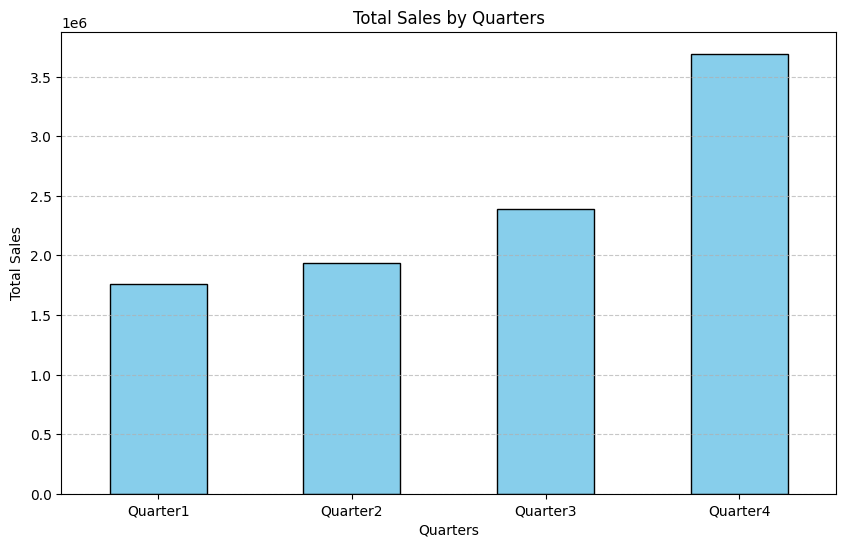

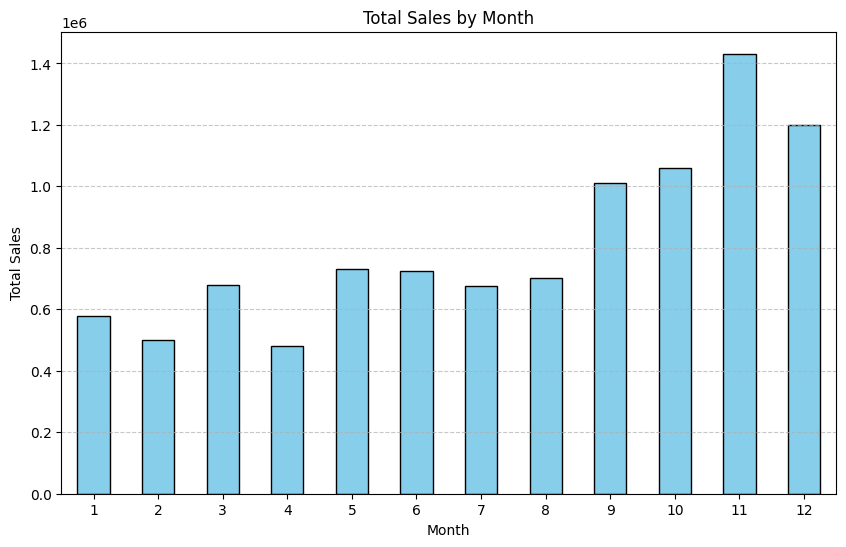

In [43]:
def plot_total_sales(data, column):

    total_sales = data.groupby(column)['Cost'].sum()

    plt.figure(figsize=(10, 6))
    total_sales.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.title(f'Total Sales by {column}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_total_sales(retail_df, 'Quarters')

plot_total_sales(retail_df, 'Month')

/tmp/ipykernel_70108/3997452094.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales = data.groupby(column)['Cost'].sum().reset_index()
/tmp/ipykernel_70108/3997452094.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_total_sales = data.groupby(column)['Cost'].sum()


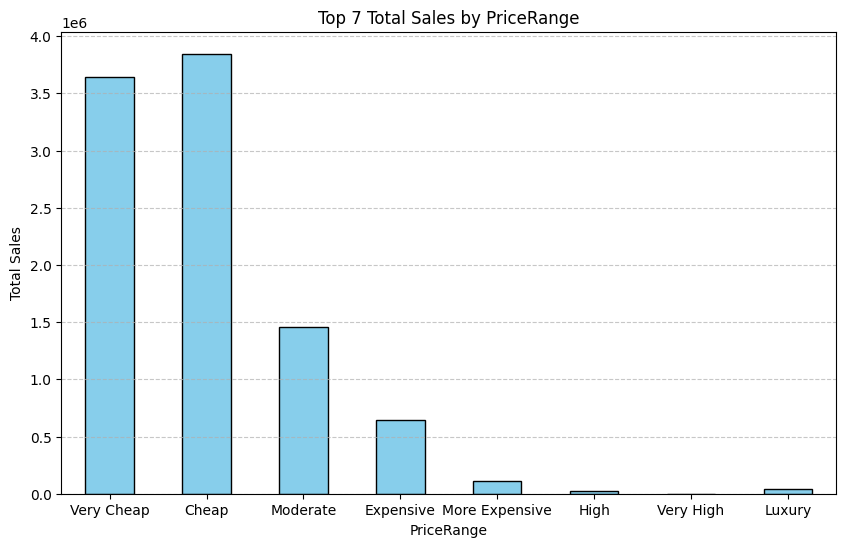

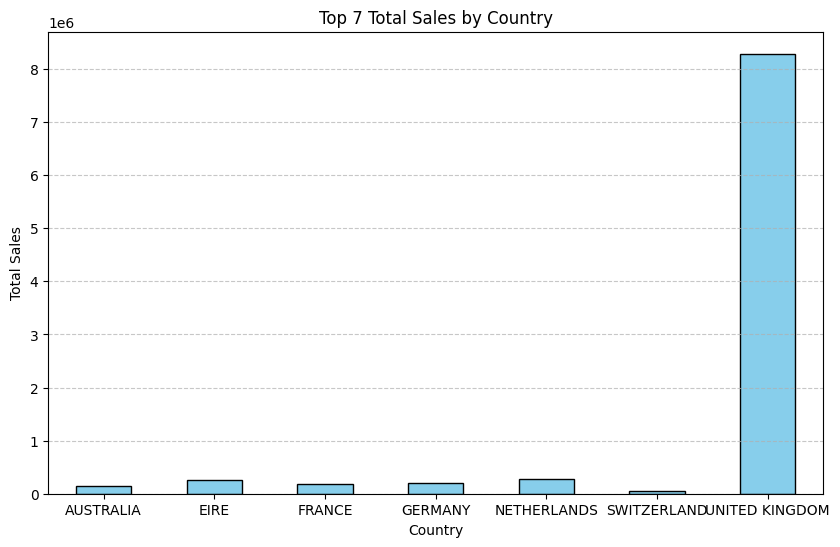

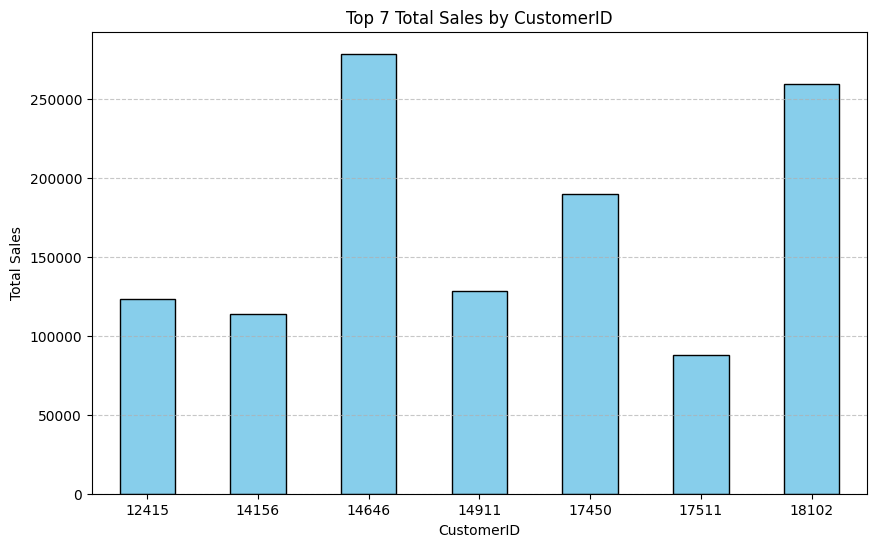

In [44]:
def plot_top_sales(data, column, top_n=7):
    total_sales = data.groupby(column)['Cost'].sum().reset_index()
    
    total_sales = total_sales.sort_values(by='Cost', ascending=False)
    
    top_groups = total_sales.head(top_n)[column].tolist()
    
    data = data[data[column].isin(top_groups)]
    
    top_total_sales = data.groupby(column)['Cost'].sum()
    
    plt.figure(figsize=(10, 6))
    top_total_sales.plot(kind='bar', color='skyblue', edgecolor='black')
    
    plt.xlabel(column)
    plt.ylabel('Total Sales')
    plt.title(f'Top {top_n} Total Sales by {column}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_top_sales(retail_df, 'PriceRange')
plot_top_sales(retail_df, 'Country')
plot_top_sales(retail_df, 'CustomerID')

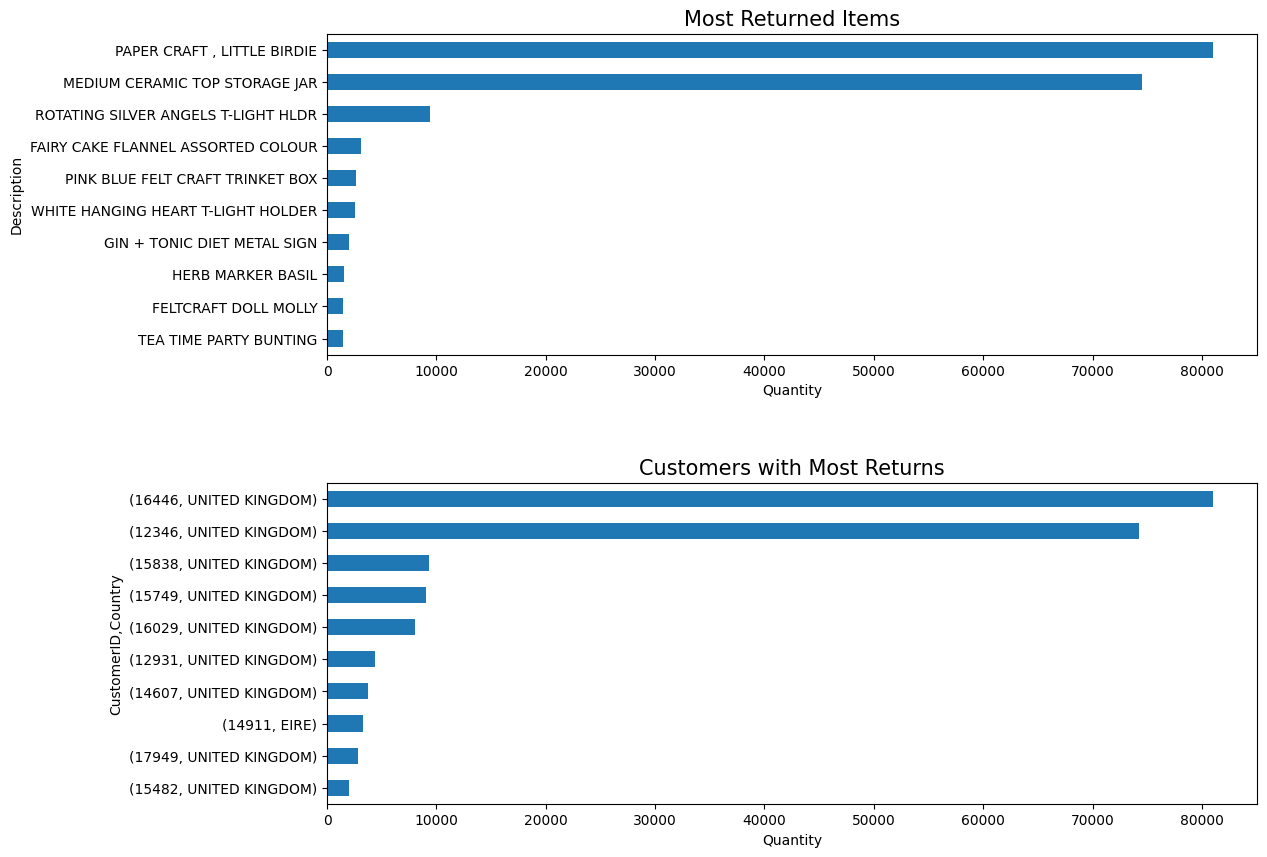

In [45]:
#finding the most returned items and the customers with the corresponding country
ReturnedItems = retail_df[retail_df.Quantity<0].groupby('Description')['Quantity'].sum()
ReturnedItems = ReturnedItems.abs().sort_values(ascending=False)[0:10]
ReturnCust = retail_df[retail_df.Quantity<0].groupby(['CustomerID','Country'])['Quantity'].sum()
ReturnCust = ReturnCust.abs().sort_values(ascending=False)[0:10]
#creting the subplot
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
ReturnedItems.sort_values().plot(kind='barh', ax=ax1).set_title('Most Returned Items', fontsize=15)
ReturnCust.sort_values().plot(kind='barh', ax=ax2).set_title('Customers with Most Returns', fontsize=15)
ax1.set(xlabel='Quantity')
ax2.set(xlabel='Quantity')
plt.subplots_adjust(hspace=0.4)
plt.show()

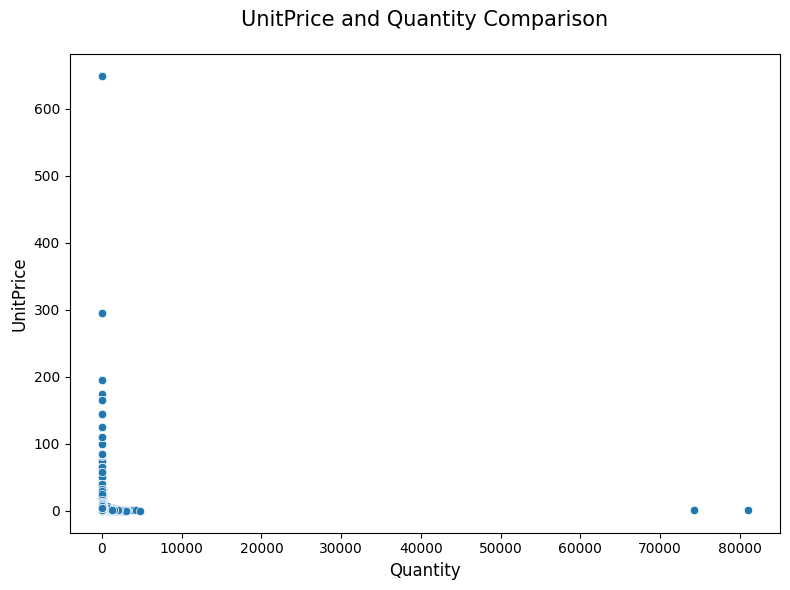

In [46]:
# Filter the DataFrame for rows where Cost is greater than 0
filtered_df = retail_df[retail_df['Cost'] > 0]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the scatter plot
sns.scatterplot(x="Quantity", y="UnitPrice", data=filtered_df, ax=ax)

# Set axis labels
ax.set_xlabel("Quantity", fontsize=12)
ax.set_ylabel("UnitPrice", fontsize=12)

# Set title
ax.set_title("UnitPrice and Quantity Comparison", fontsize=15, pad=20)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

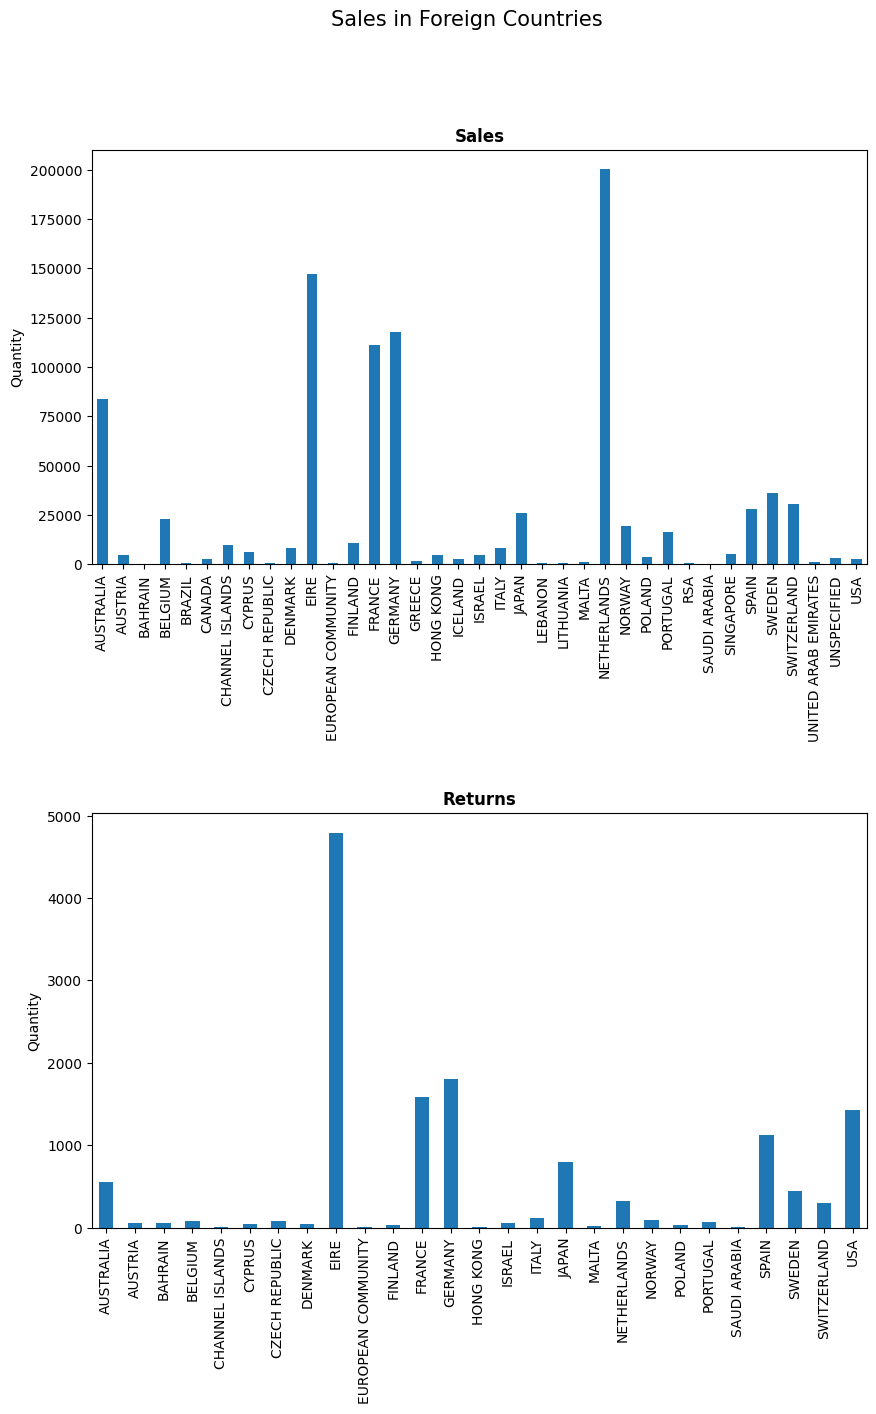

In [47]:
#grouping data by the countries(except UK)
ByCountrySale = retail_df[(retail_df.Country != 'UNITED KINGDOM') & (retail_df.Quantity > 0)].groupby('Country')['Quantity'].sum()
ByCountryRet = retail_df[(retail_df.Country != 'UNITED KINGDOM') & (retail_df.Quantity < 0)].groupby('Country')['Quantity'].sum().abs()
#creating the subplot
fig, [ax1,ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10,14))
ByCountrySale.plot(kind='bar', ax=ax1).set(ylabel = 'Quantity',xlabel='')
ax1.set_title('Sales', size=12, fontweight = 'bold')
ByCountryRet.plot(kind='bar', ax=ax2).set(ylabel = 'Quantity',xlabel='')
ax2.set_title('Returns', size=12, fontweight = 'bold')
plt.suptitle('Sales in Foreign Countries', fontsize = 15)
plt.subplots_adjust(hspace = 0.6)
plt.show()

/tmp/ipykernel_70108/3501719785.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(retail_df['Quantity'], ax=ax1)
/tmp/ipykernel_70108/3501719785.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(retail_df['UnitPrice'], ax=ax2)


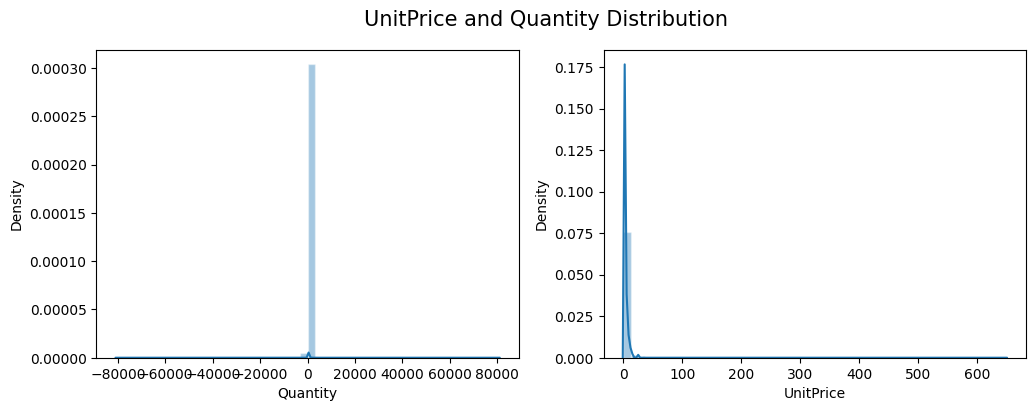

In [48]:
#creating distribution plots
fig , [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
with sns.axes_style('dark'):
    sns.distplot(retail_df['Quantity'], ax=ax1)
    sns.distplot(retail_df['UnitPrice'], ax=ax2)
fig.suptitle('UnitPrice and Quantity Distribution', fontsize = 15)
plt.show()

/tmp/ipykernel_70108/2976574794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='muted')


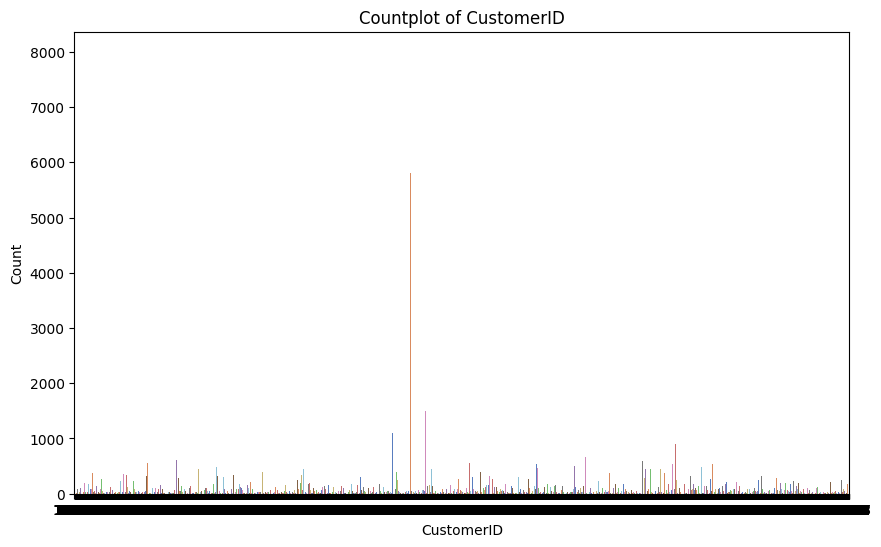

/tmp/ipykernel_70108/2976574794.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='muted')


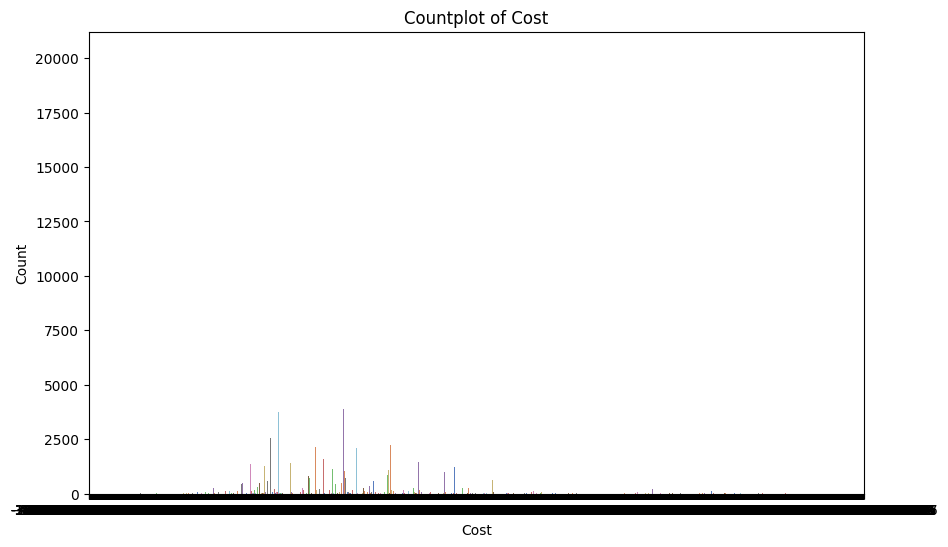

In [49]:
def plot_countplot(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, palette='muted')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Countplot of {column}')
    plt.show()

# Call the function to plot countplot for CustomerID
plot_countplot(retail_df, 'CustomerID')

# Call the function to plot countplot for Cost
plot_countplot(retail_df, 'Cost')


/tmp/ipykernel_70108/1153871607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data[column].isin(top_values.index)], x=column, palette='muted')


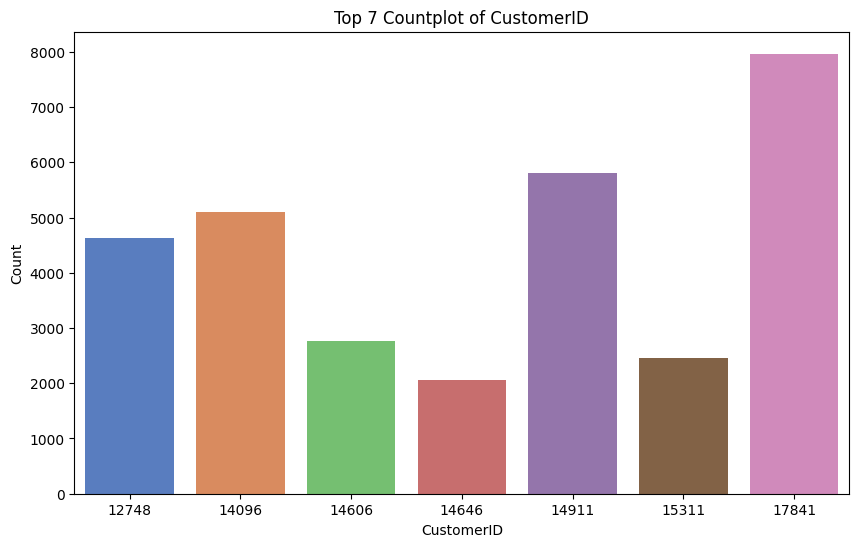

/tmp/ipykernel_70108/1153871607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data[column].isin(top_values.index)], x=column, palette='muted')


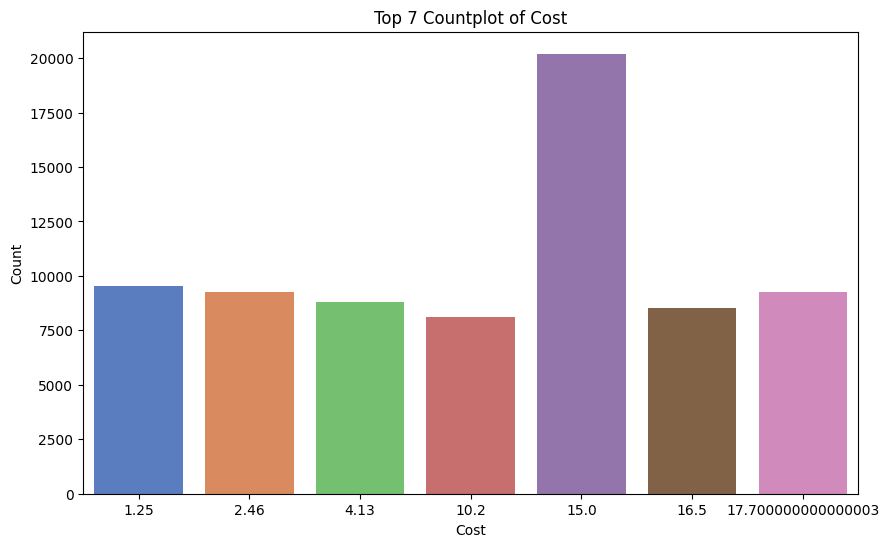

/tmp/ipykernel_70108/1153871607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data[column].isin(top_values.index)], x=column, palette='muted')


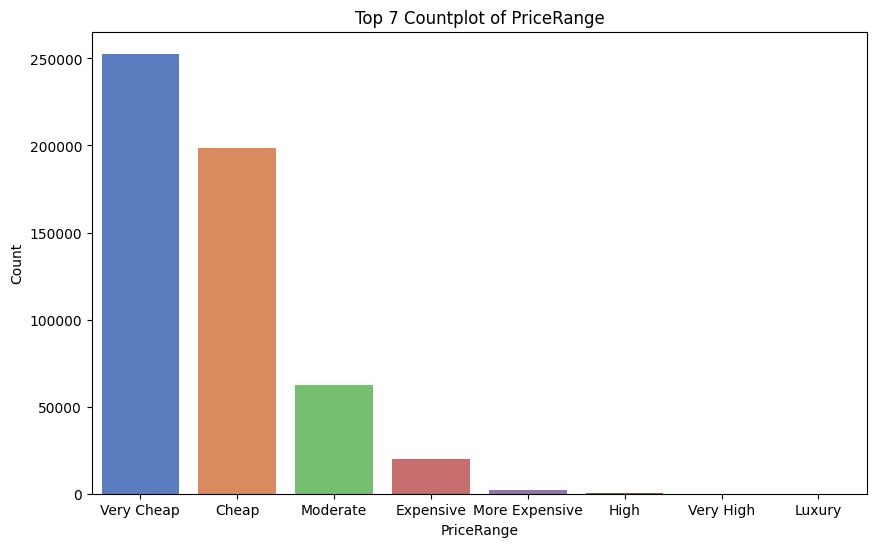

In [50]:
def plot_countplot(data, column, top_n=7):
    top_values = data[column].value_counts().head(top_n)
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data[data[column].isin(top_values.index)], x=column, palette='muted')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Top {top_n} Countplot of {column}')
    plt.show()

# Call the function to plot countplot for CustomerID (top 20 values)
plot_countplot(retail_df, 'CustomerID')

# Call the function to plot countplot for Cost (top 20 values)
plot_countplot(retail_df, 'Cost')

plot_countplot(retail_df, 'PriceRange')

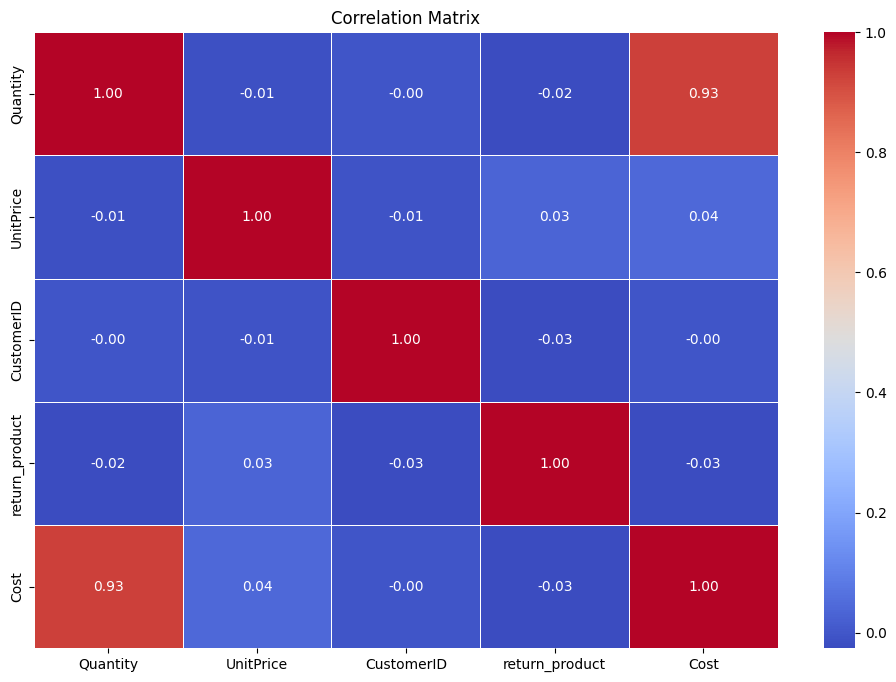

In [51]:
# Exclude non-numeric columns from correlation calculation
numeric_cols = retail_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = retail_df[numeric_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

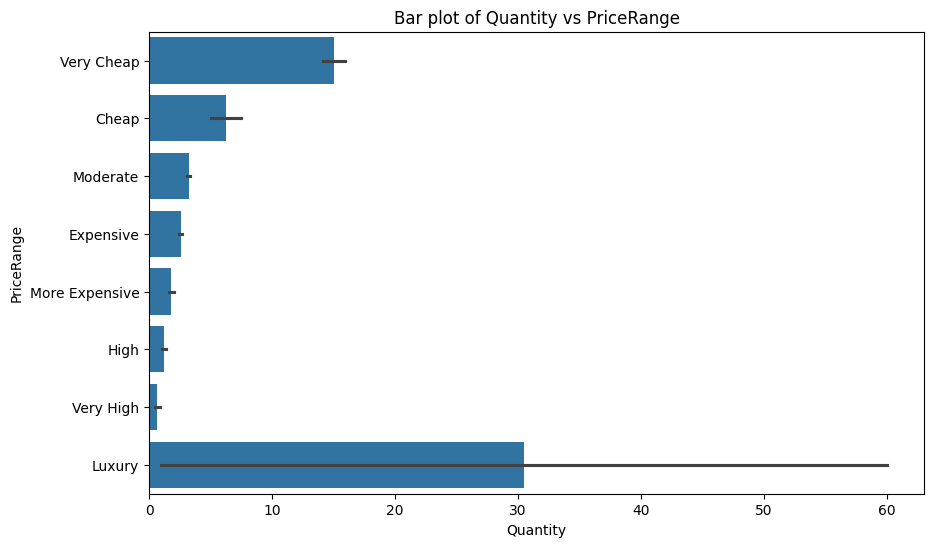

In [52]:
def plot_barplot(data, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x_col, y=y_col)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Bar plot of {x_col} vs {y_col}')
    plt.show()

# Call the function to plot bar plot for CustomerID vs PriceRange
plot_barplot(retail_df, 'Quantity', 'PriceRange')

In [53]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'PriceRange', 'Date', 'Month', 'Year',
       'return_product', 'Quarters', 'Cost'],
      dtype='object')

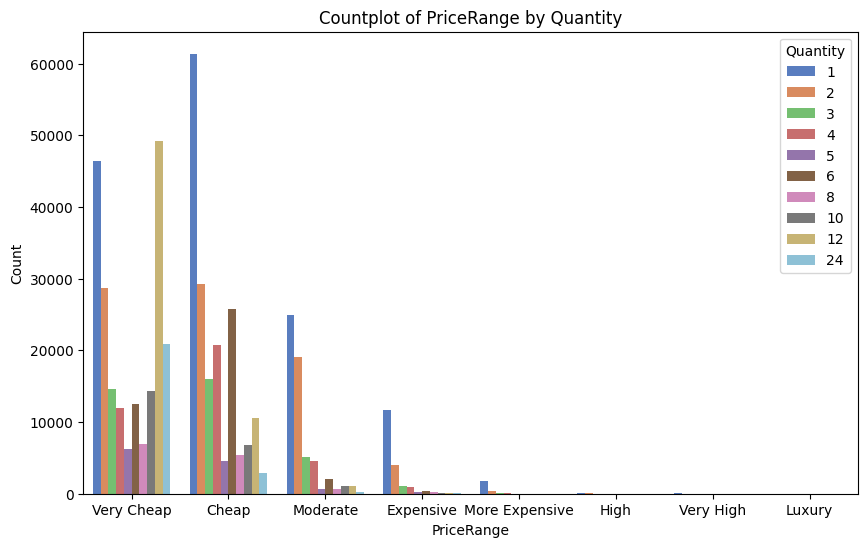

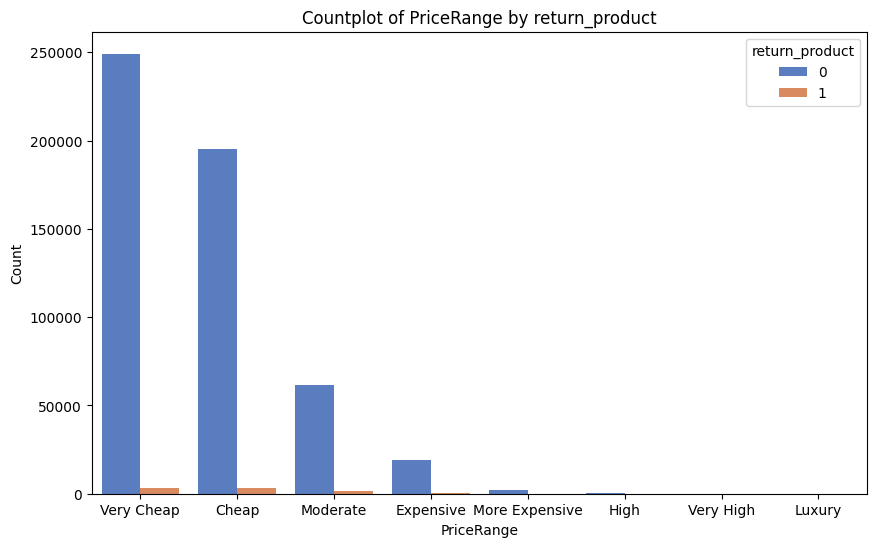

In [54]:
def plot_countplot(data, x_col, y_col, top_n=None):
    plt.figure(figsize=(10, 6))
    
    # Filter the data to get the top N values of y_col
    if top_n:
        top_values = data[y_col].value_counts().head(top_n).index
        data = data[data[y_col].isin(top_values)]
    
    sns.countplot(data=data, x=x_col, hue=y_col, palette='muted')
    
    plt.xlabel(x_col)
    plt.ylabel('Count')
    plt.title(f'Countplot of {x_col} by {y_col}')
    plt.show()

# Call the function to plot countplot for top 10 values of Quantity by PriceRange
plot_countplot(retail_df, 'PriceRange', 'Quantity', top_n=10)
plot_countplot(retail_df, 'PriceRange', 'return_product', top_n=10)

/tmp/ipykernel_70108/282958489.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(retail_df[col], ax=axs[i], kde=False)
/tmp/ipykernel_70108/282958489.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(retail_df[col], ax=axs[i], kde=False)


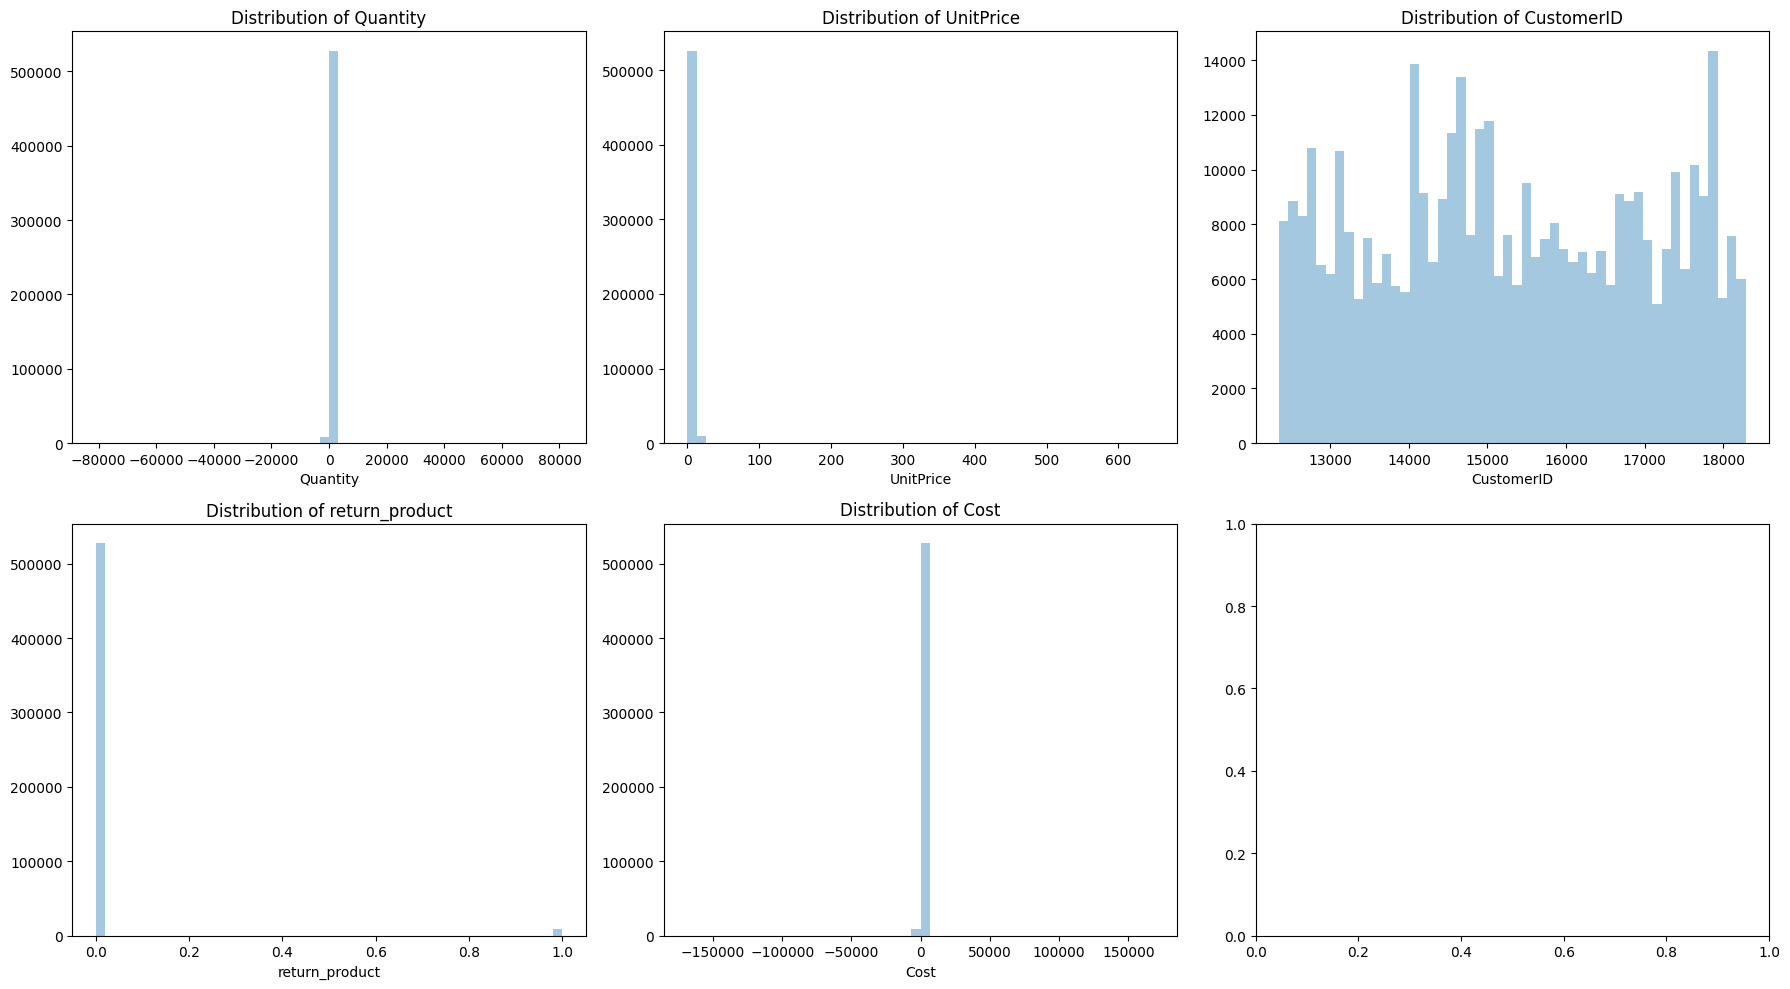

/tmp/ipykernel_70108/282958489.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(retail_df[col].value_counts().sort_index(), ax=axs[i], kde=False)
/tmp/ipykernel_70108/282958489.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(retail_df[col].value_counts().sort_index(), ax=axs[i], kde=Fal

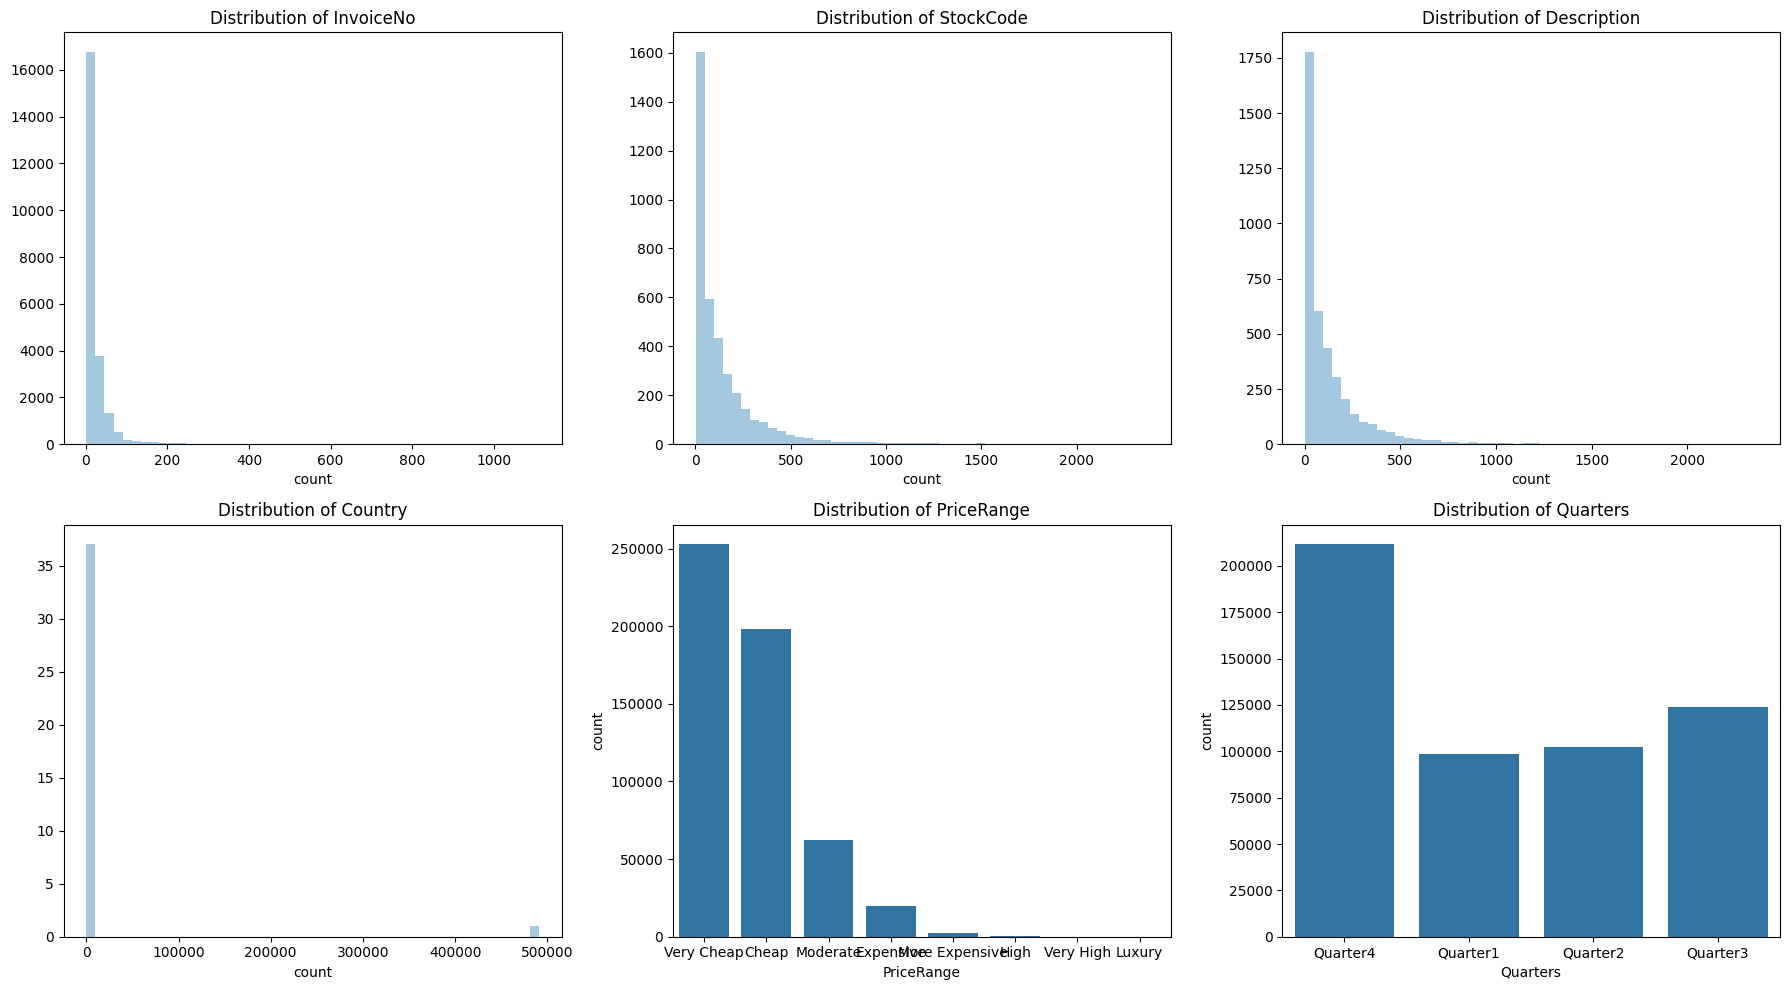

In [55]:
# Numerical columns
numerical_cols = retail_df.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
categorical_cols = retail_df.select_dtypes(include=['category', 'object']).columns

# Plot distributions for numerical columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(numerical_cols):
    sns.distplot(retail_df[col], ax=axs[i], kde=False)
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Plot distributions for categorical columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(categorical_cols):
    if retail_df[col].nunique() <= 10:  # For columns with 10 or fewer unique values
        sns.countplot(x=col, data=retail_df, ax=axs[i])
    else:  # For columns with more than 10 unique values
        sns.distplot(retail_df[col].value_counts().sort_index(), ax=axs[i], kde=False)
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

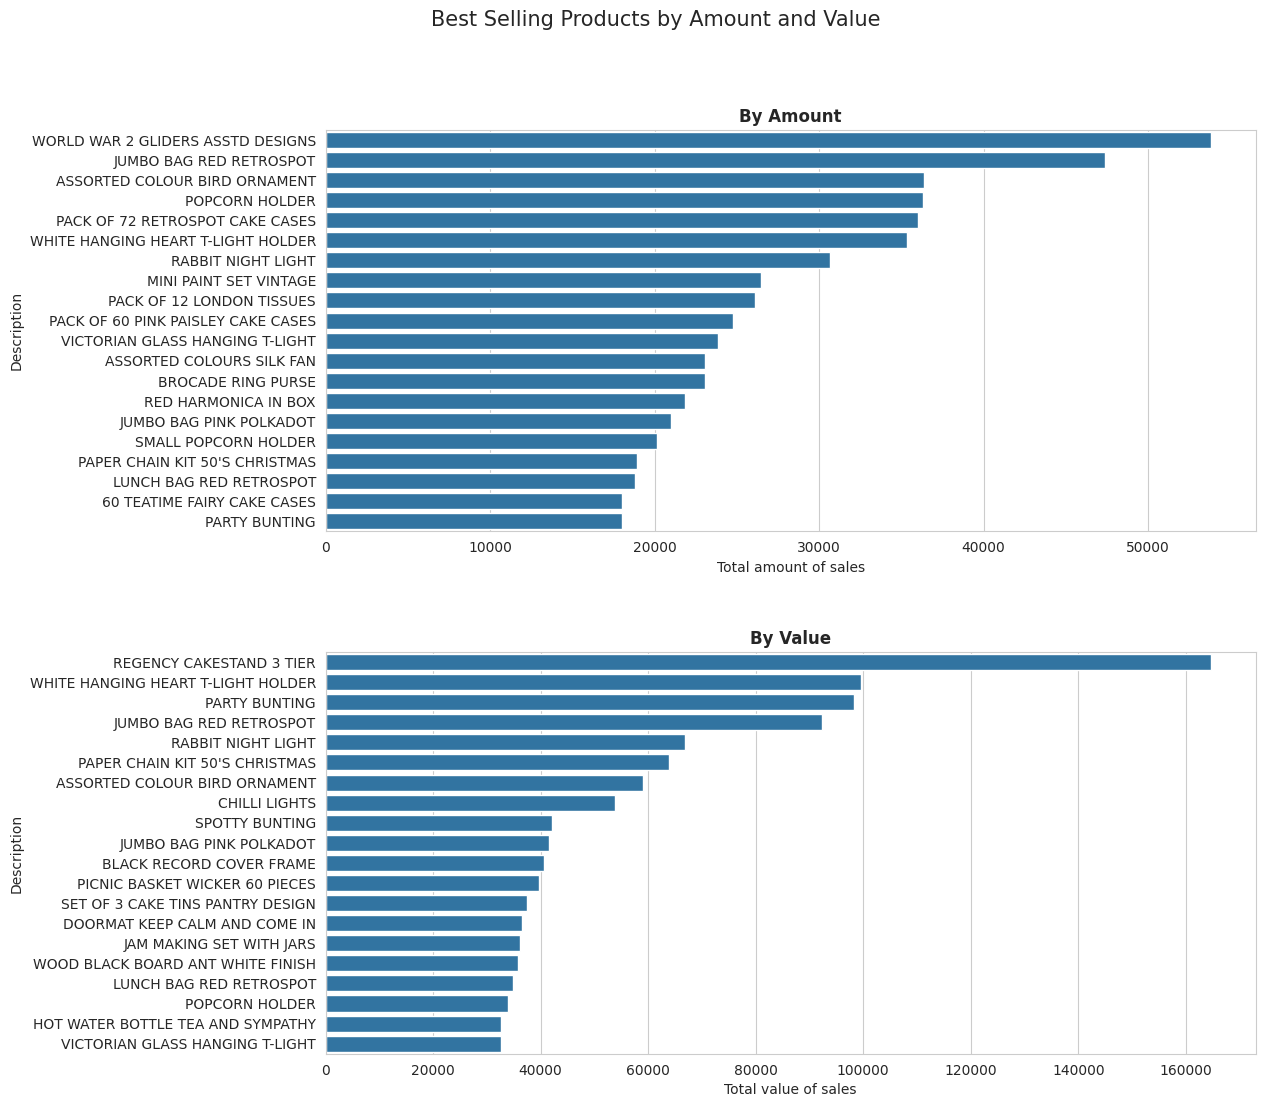

In [56]:
#top 20 products by quantity and finalprice
sns.set_style('whitegrid')
quantity = retail_df.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False)[0:20]
price = retail_df.groupby('Description')['Cost'].agg('sum').sort_values(ascending=False)[0:20]
#creating the subplot
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (12,12))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Best Selling Products by Amount and Value', fontsize=15, x = 0.4, y = 0.98)
sns.barplot(x=quantity.values, y=quantity.index, ax= axs[0]).set(xlabel='Total amount of sales')
axs[0].set_title('By Amount', size=12, fontweight = 'bold')
sns.barplot(x=price.values, y=price.index, ax= axs[1]).set(xlabel='Total value of sales')
axs[1].set_title('By Value', size=12, fontweight = 'bold')
plt.show()

In [57]:
# def visualize_distribution(data):
#     for column in data.columns:
#         plt.figure(figsize=(10, 6))
#         try:
#             # Check if the column is numeric or categorical
#             if data[column].dtype in ['int64', 'float64', 'int32']:
#                 sns.histplot(data=data, x=column, kde=True, color='skyblue', edgecolor='black')
#                 plt.xlabel(column)
#                 plt.ylabel('Frequency')
#                 plt.title(f'Distribution of {column}')
#             else:
#                 sns.countplot(data=data, x=column, palette='muted')
#                 plt.xlabel(column)
#                 plt.ylabel('Count')
#                 plt.title(f'Distribution of {column}')
#                 plt.xticks(rotation=45)
#         except Exception as e:
#             print(f"Error occurred while visualizing column '{column}': {str(e)}")
        
#         plt.show()

# # Call the function to visualize the distribution of each column
# visualize_distribution(retail_df)

In [58]:
# # Check all the rows where 'Alpha_A' has a value of 1
# alpha_a_rows = retail_df[retail_df['Alpha_'] == 1]
# alpha_a_rows

In [59]:
retail_df.isna().sum()

InvoiceNo              0
StockCode              0
Description            0
Quantity               0
UnitPrice              0
CustomerID        131461
Country                0
PriceRange             0
Date                   0
Month                  0
Year                   0
return_product         0
Quarters               0
Cost                   0
dtype: int64

In [60]:
null_valued_rows = retail_df[retail_df.isnull().any(axis=1)]
null_valued_rows

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,PriceRange,Date,Month,Year,return_product,Quarters,Cost
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,<NA>,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,<NA>,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,0.85,<NA>,UNITED KINGDOM,Very Cheap,1,12,2010,0,Quarter4,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,<NA>,UNITED KINGDOM,Very Cheap,1,12,2010,0,Quarter4,3.32
1447,536544,21790,VINTAGE SNAP CARDS,9,1.66,<NA>,UNITED KINGDOM,Very Cheap,1,12,2010,0,Quarter4,14.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541535,581498,85049E,SCANDINAVIAN REDS RIBBONS,4,3.29,<NA>,UNITED KINGDOM,Cheap,9,12,2011,0,Quarter4,13.16
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,4.13,<NA>,UNITED KINGDOM,Cheap,9,12,2011,0,Quarter4,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13,<NA>,UNITED KINGDOM,Cheap,9,12,2011,0,Quarter4,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96,<NA>,UNITED KINGDOM,Cheap,9,12,2011,0,Quarter4,4.96


In [61]:
retail_df = retail_df.dropna(how='any')
retail_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,PriceRange,Date,Month,Year,return_product,Quarters,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,3.39,17850,UNITED KINGDOM,Cheap,1,12,2010,0,Quarter4,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,FRANCE,Very Cheap,9,12,2011,0,Quarter4,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,FRANCE,Cheap,9,12,2011,0,Quarter4,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,FRANCE,Cheap,9,12,2011,0,Quarter4,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,FRANCE,Cheap,9,12,2011,0,Quarter4,16.60


In [62]:
def map_negative_to_positive(df):
    df['Quantity'] = df['Quantity'].apply(lambda x: abs(x) if x < 0 else x)
    return df

retail_df = map_negative_to_positive(retail_df)

/tmp/ipykernel_70108/85503615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].apply(lambda x: abs(x) if x < 0 else x)


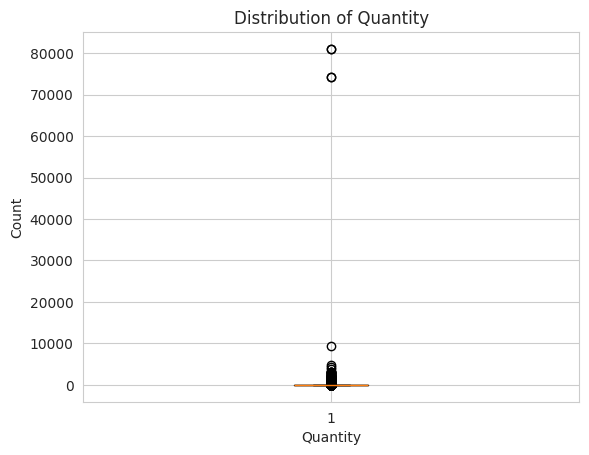

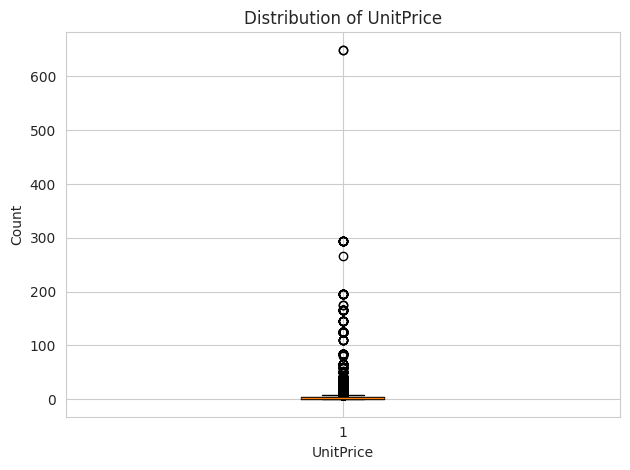

In [64]:
plt.boxplot(retail_df['Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Distribution of Quantity')
plt.show()

plt.boxplot(retail_df['UnitPrice'])
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.title('Distribution of UnitPrice')

plt.tight_layout()
plt.show()

In [65]:
def identify_outliers(data_column):
  """
  This function identifies potential outliers in a given DataFrame column.

  Args:
      data_column (pandas.Series): The DataFrame column to analyze.

  Returns:
      int: The number of potential outliers in the column.
  """
  Q1 = data_column.quantile(0.25)
  Q3 = data_column.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = (data_column < lower_bound) | (data_column > upper_bound)
  number_of_outliers = outliers.sum()
  print(f"Number of potential outliers in '{data_column.name}': {number_of_outliers}")
  return number_of_outliers

In [66]:
quantity_outliers = identify_outliers(retail_df['Quantity'])
unitprice_outliers = identify_outliers(retail_df['UnitPrice'])


Number of potential outliers in 'Quantity': 26110
Number of potential outliers in 'UnitPrice': 34469


In [76]:
def outlier_treatment(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    
    # Replace outliers with upper or lower limit
    data[column] = data[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    
    return data

# Apply outlier treatment to 'Quantity' column
retail_df = outlier_treatment(retail_df, 'Quantity')

/tmp/ipykernel_70108/1558483181.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))


In [77]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column is categorical (i.e., object type or category type)
        if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):
            # Fit LabelEncoder on the column and transform the values
            df[col] = label_encoder.fit_transform(df[col])

    return df

# Call the function to encode categorical features
retail_df = encode_categorical_features(retail_df)


/tmp/ipykernel_70108/3777273962.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col]):


In [78]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402200 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       402200 non-null  int64  
 1   StockCode       402200 non-null  int64  
 2   Description     402200 non-null  int64  
 3   Quantity        402200 non-null  int64  
 4   UnitPrice       402200 non-null  float64
 5   CustomerID      402200 non-null  Int64  
 6   Country         402200 non-null  int64  
 7   PriceRange      402200 non-null  int64  
 8   Date            402200 non-null  int32  
 9   Month           402200 non-null  int32  
 10  Year            402200 non-null  int32  
 11  return_product  402200 non-null  int64  
 12  Quarters        402200 non-null  int64  
 13  Cost            402200 non-null  float64
dtypes: Int64(1), float64(2), int32(3), int64(8)
memory usage: 41.8 MB


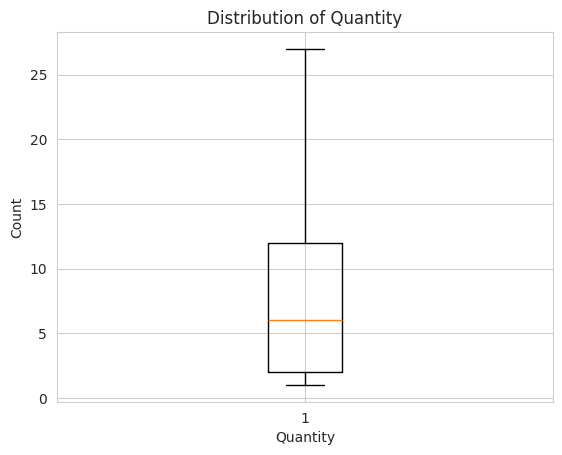

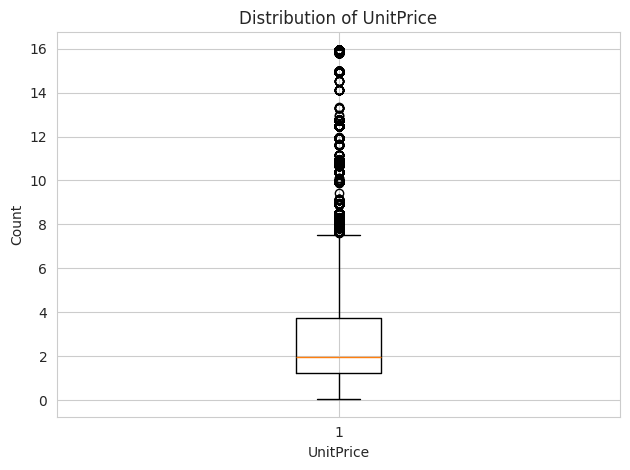

In [79]:
plt.boxplot(retail_df['Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Distribution of Quantity')
plt.show()

plt.boxplot(retail_df['UnitPrice'])
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.title('Distribution of UnitPrice')

plt.tight_layout()
plt.show()